> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Life Expectancy Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

It is a fact that life expectancy differs from one part of the world to another. In this project, we will be investigating factors that tend to affect life expectancy. 
The datasets chosen for this project was gotten from Gapminder World. Six datasets were selected for this analysis. These include data on: life expectancy, male life expectancy, basic sanitation, estimated income per person, employment rate, and urban population. 
Data for some matrics are not available for certain years. Hence, we will be assessing this data for a 17-year period, begining from the year 2000.

We will be answering questions like:
Which country improved most in life expectancy during the past 17 years and by what margin? 
Which country declined the most in life expectancy and by what margin? 
What factors are associated with life expectancy?
How do men compare in the life expectancy matric?


> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.

> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. In order to work with the data in this workspace, you also need to upload it to the workspace. To do so, click on the jupyter icon in the upper left to be taken back to the workspace directory. There should be an 'Upload' button in the upper right that will let you add your data file(s) to the workspace. You can then click on the .ipynb file name to come back here.

In [57]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

import numpy as np
import pandas as pd
from functools import reduce
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

There are six datasets in all. It will be loaded one at a time. This first data shows in percentage persons using at least basic sanitation services.

In [58]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

# Loading basic sanitation data
sanitation = pd.read_csv('basic_sanitation.csv')
sanitation.head()

,country,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Afghanistan,0.235,0.235,0.246,0.258,0.269,0.280,0.292,0.304,0.317,0.329,0.342,0.355,0.367,0.381,0.394,0.407,0.421,0.434
1,Albania,0.883,0.891,0.899,0.907,0.914,0.922,0.929,0.936,0.943,0.949,0.956,0.962,0.968,0.973,0.977,0.977,0.977,0.977
2,Algeria,0.837,0.841,0.844,0.847,0.850,0.853,0.856,0.858,0.861,0.863,0.866,0.868,0.870,0.872,0.873,0.875,0.875,0.876
3,Andorra,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
4,Angola,0.276,0.290,0.304,0.319,0.333,0.347,0.360,0.373,0.385,0.398,0.411,0.423,0.436,0.449,0.461,0.474,0.486,0.499


In [3]:
#reshaping the data so that a single column could be used for 'year'
sanitation_1 = sanitation.melt(id_vars='country', var_name='year', value_name='sanitation')
sanitation_1.head()

,country,year,sanitation
0,Afghanistan,2000,0.235
1,Albania,2000,0.883
2,Algeria,2000,0.837
3,Andorra,2000,1.000
4,Angola,2000,0.276


In [4]:
# sorting the data according to 'country' and 'year' and assigning 'country' as index
sanitation_2 = sanitation_1.sort_values(by = ['country', 'year']).set_index('country')
sanitation_2.head()

,year,sanitation
country,,
Afghanistan,2000,0.235
Afghanistan,2001,0.235
Afghanistan,2002,0.246
Afghanistan,2003,0.258
Afghanistan,2004,0.269


The next data 'employment' is the employment rate for each country between year 2000 and 2017.

In [5]:
employment = pd.read_csv('employment_rate.csv')
employment.head()

,country,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Afghanistan,0.453,0.462,0.454,0.455,0.474,0.460,0.460,0.460,0.459,...,0.484,0.487,0.491,0.494,0.494,0.495,0.495,0.495,0.496,0.496
1,Albania,0.508,0.506,0.487,0.484,0.481,0.482,0.489,0.488,0.483,...,0.453,0.449,0.468,0.477,0.483,0.474,0.473,0.472,0.472,0.471
2,Algeria,0.344,0.337,0.331,0.326,0.307,0.321,0.332,0.324,0.315,...,0.394,0.371,0.368,0.372,0.372,0.372,0.372,0.371,0.369,0.367
3,Angola,0.598,0.597,0.597,0.595,0.592,0.592,0.592,0.592,0.593,...,0.722,0.722,0.721,0.717,0.713,0.709,0.706,0.703,0.700,0.697
4,Argentina,0.565,0.563,0.542,0.534,0.491,0.503,0.521,0.537,0.529,...,0.561,0.555,0.557,0.547,0.548,0.548,0.549,0.545,0.542,0.539


In [6]:
#reshaping the data so that a single column could be used for 'year'
employment_1 = employment.melt(id_vars = 'country', var_name = 'year', value_name = 'employment_rate')

In [7]:
# sorting the data according to 'country' and 'year' and assigning 'country' as index
employment_2 = employment_1.sort_values(by = ['country', 'year']).set_index('country')
employment_2.head()

,year,employment_rate
country,,
Afghanistan,1991,0.453
Afghanistan,1992,0.462
Afghanistan,1993,0.454
Afghanistan,1994,0.455
Afghanistan,1995,0.474


This data 'life' or life expectancy shows the average number of years a newborn child would live if current mortality patterns were to stay the same.

In [8]:
life = pd.read_csv('life_expectancy.csv')
life.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Afghanistan,28.2,28.2,28.2,28.2,28.2,28.2,28.1,28.1,28.1,...,76.5,76.6,76.7,76.9,77.0,77.1,77.3,77.4,77.5,77.7
1,Albania,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,...,87.4,87.5,87.6,87.7,87.8,87.9,88.0,88.1,88.2,88.3
2,Algeria,28.8,28.8,28.8,28.8,28.8,28.8,28.8,28.8,28.8,...,88.3,88.4,88.5,88.6,88.7,88.8,88.9,89.0,89.1,89.2
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,...,78.7,78.9,79.0,79.1,79.3,79.4,79.5,79.7,79.8,79.9


In [9]:
#reshaping the data so that a single column could be used for 'year'
life_1 = life.melt(id_vars = 'country', var_name = 'year', value_name = 'life_expectancy')

In [10]:
# sorting the data according to 'country' and 'year' and assigning 'country' as index
life_2 = life_1.sort_values(by = ['country', 'year']).set_index('country')
life_2.head()

,year,life_expectancy
country,,
Afghanistan,1800,28.2
Afghanistan,1801,28.2
Afghanistan,1802,28.2
Afghanistan,1803,28.2
Afghanistan,1804,28.2


The income data is the income per person or GDP/capita in USD for a particular year.

In [11]:
income = pd.read_csv('income_per_person.csv')
income.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040
0,Afghanistan,603,603,603,603,603,603,603,603,603,...,2550,2600,2660,2710,2770,2820,2880,2940,3000,3060
1,Albania,667,667,667,667,667,668,668,668,668,...,19400,19800,20200,20600,21000,21500,21900,22300,22800,23300
2,Algeria,715,716,717,718,719,720,721,722,723,...,14300,14600,14900,15200,15500,15800,16100,16500,16800,17100
3,Andorra,1200,1200,1200,1200,1210,1210,1210,1210,1220,...,73600,75100,76700,78300,79900,81500,83100,84800,86500,88300
4,Angola,618,620,623,626,628,631,634,637,640,...,6110,6230,6350,6480,6610,6750,6880,7020,7170,7310


In [12]:
#reshaping the data so that a single column could be used for 'year'
income_1 = income.melt(id_vars = 'country', var_name = 'year', value_name = 'income')

In [13]:
# sorting the data according to 'country' and 'year' and assigning 'country' as index
income_2 = income_1.sort_values(by = ['country', 'year']).set_index('country')
income_2.head()

,year,income
country,,
Afghanistan,1800,603
Afghanistan,1801,603
Afghanistan,1802,603
Afghanistan,1803,603
Afghanistan,1804,603


The data 'urban' is the percentage of people living in urban areas for a given year.

In [14]:
urban = pd.read_csv('urban_population.csv')
urban.head()

,country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Afghanistan,0.084,0.0868,0.0898,0.0928,0.0959,0.099,0.102,0.106,0.109,...,0.235,0.237,0.239,0.242,0.244,0.246,0.248,0.250,0.253,0.255
1,Albania,0.307,0.3090,0.3100,0.3110,0.3120,0.312,0.313,0.314,0.314,...,0.511,0.522,0.532,0.543,0.554,0.564,0.574,0.584,0.594,0.603
2,Algeria,0.305,0.3180,0.3320,0.3470,0.3610,0.376,0.388,0.390,0.392,...,0.668,0.675,0.682,0.689,0.696,0.702,0.708,0.715,0.721,0.726
3,Andorra,0.585,0.6100,0.6350,0.6590,0.6820,0.704,0.726,0.746,0.766,...,0.889,0.888,0.887,0.886,0.885,0.884,0.883,0.882,0.882,0.881
4,Angola,0.104,0.1080,0.1120,0.1160,0.1210,0.125,0.130,0.134,0.139,...,0.590,0.598,0.605,0.613,0.620,0.627,0.634,0.641,0.648,0.655


In [15]:
#reshaping the data so that a single column could be used for 'year'
urban_1 = urban.melt(id_vars = 'country', var_name = 'year', value_name = 'urban_population')

In [16]:
# sorting the data according to 'country' and 'year' and assigning 'country' as index
urban_2 = urban_1.sort_values(['country', 'year']).set_index('country')
urban_2.head()

,year,urban_population
country,,
Afghanistan,1960,0.0840
Afghanistan,1961,0.0868
Afghanistan,1962,0.0898
Afghanistan,1963,0.0928
Afghanistan,1964,0.0959


The data to be uploaded next gives the life expectancy (in age) of males for a particular year.

In [17]:
male = pd.read_csv('life_expectancy_male.csv')
male.head()

,country,1950,1951,1952,1953,1954,1955,1956,1957,1958,...,2090,2091,2092,2093,2094,2095,2096,2097,2098,2099
0,Afghanistan,27.0,27.2,27.7,28.2,28.7,29.2,29.7,30.2,30.7,...,75.2,75.3,75.5,75.6,75.8,75.9,76.1,76.2,76.4,76.5
1,Albania,53.2,53.4,54.0,54.7,55.4,56.2,57.2,58.2,59.2,...,86.5,86.6,86.7,86.8,86.9,87.0,87.1,87.2,87.3,87.4
2,Algeria,41.5,41.7,42.1,42.5,42.9,43.3,43.7,44.1,44.6,...,85.9,86.0,86.1,86.2,86.3,86.4,86.5,86.6,86.7,86.8
3,Angola,34.4,34.5,34.6,34.8,35.0,35.1,35.3,35.6,35.8,...,70.8,70.9,71.0,71.2,71.3,71.4,71.6,71.7,71.8,72.0
4,Antigua and Barbuda,53.9,54.4,55.2,56.0,56.8,57.6,58.3,59.0,59.6,...,84.9,85.0,85.1,85.1,85.2,85.3,85.4,85.5,85.6,85.7


In [18]:
#reshaping the data so that a single column could be used for 'year'
male_1 = male.melt(id_vars = 'country', var_name = 'year', value_name = 'life_exp_male')

In [19]:
# sorting the data according to 'country' and 'year' and assigning 'country' as index
male_2 = male_1.sort_values(by = ['country', 'year']).set_index('country')
male_2.head()

,year,life_exp_male
country,,
Afghanistan,1950,27.0
Afghanistan,1951,27.2
Afghanistan,1952,27.7
Afghanistan,1953,28.2
Afghanistan,1954,28.7


In [20]:
# All the six data are now reshaped and sorted. They have to be merged
# to form a single DataFrame
df_cleaned = [sanitation_2, employment_2, life_2, income_2, urban_2, male_2]

In [21]:
# Joining the six data.
df_final = reduce(lambda left,right: pd.merge(left,right,on=['country', 'year']), df_cleaned)
df_final.head()

,year,sanitation,employment_rate,life_expectancy,income,urban_population,life_exp_male
country,,,,,,,
Afghanistan,2000,0.235,0.459,54.6,687,0.221,54.7
Afghanistan,2001,0.235,0.459,54.8,646,0.222,55.1
Afghanistan,2002,0.246,0.477,55.6,1020,0.223,55.6
Afghanistan,2003,0.258,0.479,56.4,1060,0.224,56.1
Afghanistan,2004,0.269,0.475,56.9,1030,0.225,56.5


The six different data have been merged. They now have a common start year (2000) and end year (2017)

### Performing Operations on the data

In [22]:
# Determining the numbers of rows and columns in the data
df_final.shape

(3222, 7)

In [23]:
# Inspecting data
df_final.describe()

,sanitation,employment_rate,life_expectancy,income,urban_population,life_exp_male
count,3177.000000,3222.000000,3222.000000,3222.000000,3216.000000,3222.000000
mean,0.701423,0.575098,70.017101,16097.337989,0.554865,66.713749
std,0.308417,0.116381,8.898181,19026.590499,0.228115,9.081256
min,0.034000,0.264000,32.500000,545.000000,0.082500,38.900000
25%,0.430000,0.498000,63.900000,2992.500000,0.359000,60.700000
50%,0.847000,0.577000,72.400000,8840.000000,0.559500,68.600000
75%,0.974000,0.647000,76.700000,22200.000000,0.741000,73.500000
max,1.000000,0.878000,84.800000,124000.000000,1.000000,81.500000


In [24]:
# Inspecting data
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3222 entries, Afghanistan to Zimbabwe
Data columns (total 7 columns):
year                3222 non-null object
sanitation          3177 non-null float64
employment_rate     3222 non-null float64
life_expectancy     3222 non-null float64
income              3222 non-null int64
urban_population    3216 non-null float64
life_exp_male       3222 non-null float64
dtypes: float64(5), int64(1), object(1)
memory usage: 201.4+ KB


In [25]:
#filling in null values with mean
df_final.fillna(df_final.mean(), inplace = True)
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3222 entries, Afghanistan to Zimbabwe
Data columns (total 7 columns):
year                3222 non-null object
sanitation          3222 non-null float64
employment_rate     3222 non-null float64
life_expectancy     3222 non-null float64
income              3222 non-null int64
urban_population    3222 non-null float64
life_exp_male       3222 non-null float64
dtypes: float64(5), int64(1), object(1)
memory usage: 201.4+ KB


In [26]:
# Chaning 'year' to integer and 'income' to float
df_final['year'] = df_final['year'].astype(int)
df_final['income'] = df_final['income'].astype(float)
df_final.dtypes

year                  int64
sanitation          float64
employment_rate     float64
life_expectancy     float64
income              float64
urban_population    float64
life_exp_male       float64
dtype: object

In [27]:
#checking for duplicates in data
sum(df_final.duplicated())

0

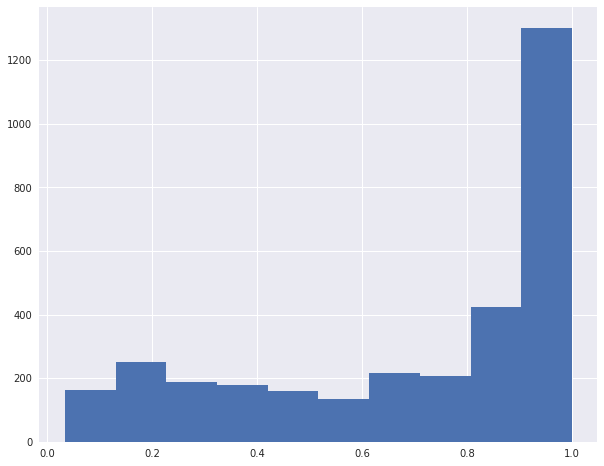

In [28]:
df_final.sanitation.hist(figsize = (10, 8));

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

In [29]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Which country improved most in life expectancy in the past 17 years?
We want to find out from our data which country improved most in terms of life expectancy over the 17 year period and which one declined.


In [30]:
#extracting life expectancy in the year 2000 from the data
expectancy_2000 = df_final.query('year in "2000"').life_expectancy

In [31]:
#extracting life expectancy in the year 2017 from the data
expectancy_2017 = df_final.query('year in "2017"').life_expectancy

In [32]:
# Difference in life expectancy between  2000 and 2016
improvement = expectancy_2017 - expectancy_2000

In [33]:
# Most improved figure (number of years)
max_imp = improvement.max()
max_imp

18.899999999999999

In [54]:
# Country with the most improved figure
max_country = improvement.idxmax()
max_country

'Rwanda'

In [55]:
# Least improved figure (number of years)
least_imp = improvement.min()
least_imp

-2.7000000000000028

In [56]:
# Country with the least improved figure
least_country = improvement.idxmin()
least_country

'Syria'

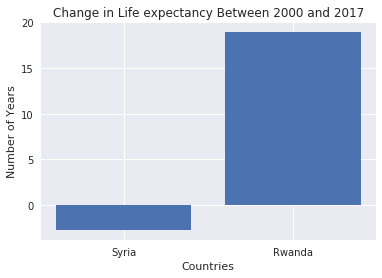

In [37]:
# Create a bar chart with proper labels

locations = [1, 2]
heights = [least_imp, max_imp]
labels = [least_country, max_country]
plt.bar(locations, heights, tick_label=labels)
plt.title('Change in Life expectancy Between 2000 and 2017')
plt.xlabel('Countries')
plt.ylabel('Number of Years');

In [38]:
df_final['sanitation'].median()

0.84200000000000008

In [39]:
p = df_final.groupby(['sanitation']).life_expectancy.mean()

## What factors are associated with life expectancy?
We will be analysing relationships between life expectancy and the following metrics: basic sanitation, income level, employment rate, and urban population. 

In [40]:
# Final data statistical properties
df_final.describe()

,year,sanitation,employment_rate,life_expectancy,income,urban_population,life_exp_male
count,3222.000000,3222.000000,3222.000000,3222.000000,3222.000000,3222.000000,3222.000000
mean,2008.500000,0.701423,0.575098,70.017101,16097.337989,0.554865,66.713749
std,5.188933,0.306255,0.116381,8.898181,19026.590499,0.227903,9.081256
min,2000.000000,0.034000,0.264000,32.500000,545.000000,0.082500,38.900000
25%,2004.000000,0.437000,0.498000,63.900000,2992.500000,0.359000,60.700000
50%,2008.500000,0.842000,0.577000,72.400000,8840.000000,0.559000,68.600000
75%,2013.000000,0.972000,0.647000,76.700000,22200.000000,0.741000,73.500000
max,2017.000000,1.000000,0.878000,84.800000,124000.000000,1.000000,81.500000


In [41]:
# Variable description at 50 percent and above Life expectancy
top = df_final.query('life_expectancy > life_expectancy.mean()')
top.describe()

,year,sanitation,employment_rate,life_expectancy,income,urban_population,life_exp_male
count,1886.000000,1886.000000,1886.000000,1886.000000,1886.000000,1886.000000,1886.000000
mean,2008.891835,0.902739,0.554850,76.272906,24408.504772,0.671519,72.890562
std,5.203036,0.116549,0.101701,3.453189,20852.541169,0.188637,4.097664
min,2000.000000,0.366000,0.289000,70.100000,1700.000000,0.182000,62.600000
25%,2004.000000,0.858000,0.492000,73.600000,9390.000000,0.553000,69.600000
50%,2009.000000,0.949000,0.565000,75.800000,16950.000000,0.686500,72.600000
75%,2013.000000,0.991000,0.615750,79.100000,35400.000000,0.813000,76.400000
max,2017.000000,1.000000,0.874000,84.800000,124000.000000,1.000000,81.500000


Comparing the mean values in the two tables above, we see that three (sanitation, income, urban_population) of four values we are comparing tend to show a relatively high change in mean values. The other variable, employment_rate show minimal change in the negative direction.
It thus appear that the variables, sanitation, income, and urban_population correlates with life expectancy. Employment rate does not seem to correlate very much.

We will further check out these relationships using a scatterd plot.

## Verifying Relationships Using Scatter Plot

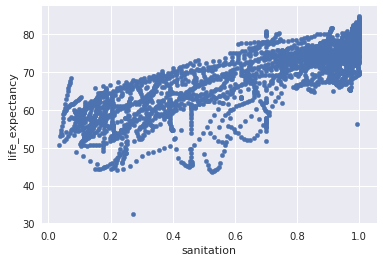

In [42]:
# scatter plot of basic sanitation and life expectancy
df_final.plot(x = 'sanitation', y = 'life_expectancy', kind = 'scatter');

There is a possitive correlation between sanitation and life expectancy

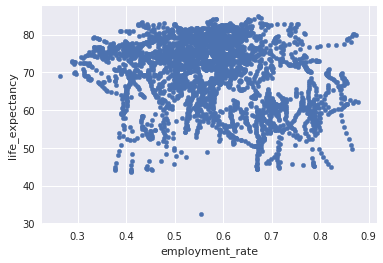

In [43]:
# scatter plot of employment rate and life expectancy
df_final.plot(x = 'employment_rate', y = 'life_expectancy', kind = 'scatter');

There is no clear correlation between employment rate and life expectancy

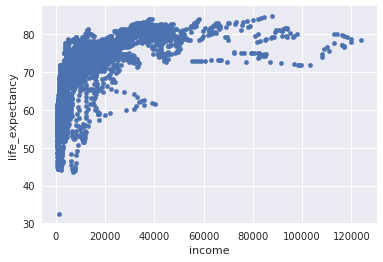

In [44]:
# scatter plot of income and life expectancy
df_final.plot(x = 'income', y = 'life_expectancy', kind = 'scatter');

There is a possitive correlation between income per person and life expectancy

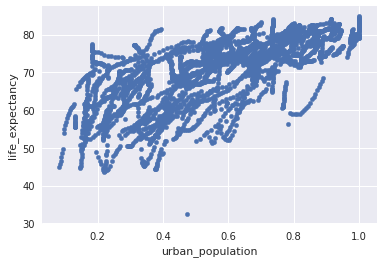

In [45]:
# scatter plot of urban population and life expectancy
df_final.plot(x = 'urban_population', y = 'life_expectancy', kind = 'scatter');

There is a possitive correlation between urban population and life expectancy

### How do men compare in the life expectancy matric?

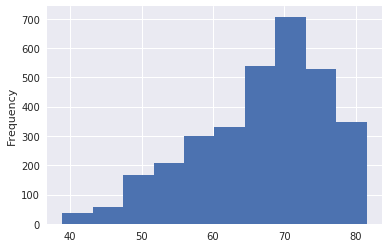

In [46]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
df_final['life_exp_male'].plot(kind = 'hist');

In [47]:
df_final['life_expectancy'].median()

72.400000000000006

In [48]:
df_final['life_exp_male'].median()

68.599999999999994

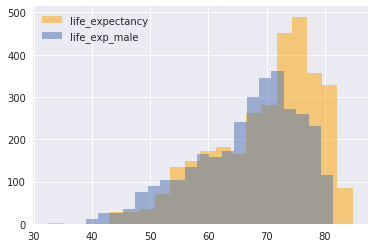

In [49]:
df_final['life_expectancy'].hist(alpha=0.5, label = 'life_expectancy', bins = 20, color = 'orange')
df_final['life_exp_male'].hist(alpha=0.5, label = 'life_exp_male', bins = 20)
plt.legend();

In [50]:
mean_life_exp = df_final['life_expectancy'].mean()

In [51]:
mean_male_exp = df_final['life_exp_male'].mean()

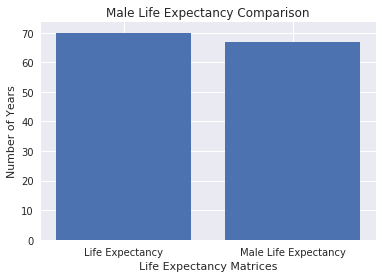

In [52]:
locations = [1, 2]
heights = [mean_life_exp, mean_male_exp]
labels = ['Life Expectancy', 'Male Life Expectancy']
plt.bar(locations, heights, tick_label=labels)
plt.title('Male Life Expectancy Comparison')
plt.xlabel('Life Expectancy Matrices')
plt.ylabel('Number of Years');

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

From the analysis done on the datasets, the questions raised at the beginning can be answered.

### Which country improved most in life expectancy in the past 17 years and by what margin? 
From the data analysed, Rwanda improved most in life expectancy between 2000 and 2017. Life expectancy improved by approximately 18.99 years.

### Which country declined the most in life expectancy and by what margin?
It can be seen that the life expectancy in Syria declined most, reducing by more than 2.7 years. 

### What factors are associated with life expectancy? 
From the data above, basic sanitation, estimated income per person, and urban population tend to have a possitive correlation with life expectancy. On the other hand, the metric 'employment rate' does not have a clear correlation with life expectancy.

### How do men compare in the life expectancy matric?
From the analysis, male life expectancy is lower than the total life expectancy. This could imply that the life expectancy of females is generally higher than that of males. However, more data and much more analysis may be required to fully determine this. 

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.

## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [53]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0